<a href="https://colab.research.google.com/github/Tzoll87/Codes/blob/master/Spotify_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The purpose of this notebook is to give a weekly level recommendation for my friend from one of the spotify playlist that he listens, trying to find the best matching song based on the attributes of his playlist. For this purpose I'm using his open playlist where he collects the songs he likes, and compare the dataset with Spotify's "All new rock" playlist to find the best match.**

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import json
from sklearn.metrics.pairwise import cosine_similarity
import yaml

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
#Credentials are saved in yml file, which is being loaded and assigned
with open('spotify.yml', 'r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)

In [ ]:
cid = data["cid"]
secret = data["secret"]

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [ ]:
#Loading the All new rock weekly playlist
playlist_id = '37i9dQZF1DWZryfp6NSvtz'
results = sp.user_playlist_tracks(user='spotify', playlist_id=playlist_id)
tracks = results['items']
while results['next']:
    results = spotify.next(results)
    tracks.extend(results['items'])

In [ ]:
#Separating tracks on playlist...
rock_track = []
for track in tracks:
    track_name = track['track']['id']
    artists = [artist['name'] for artist in track['track']['artists']]
    rock_track.append(track_name)

In [ ]:
#...and creating dataframe containing each track's information
for ids,item in enumerate(rock_track):
  audio_features = sp.audio_features(item)
  df = pd.json_normalize(audio_features)
  if ids == 0:
    final = df
  else:
    final = pd.concat([final, df], axis = 0)

In [ ]:
import requests
import base64

# set up API endpoint and credentials
endpoint = "https://accounts.spotify.com/api/token"
client_id = cid
client_secret = secret

In [ ]:
# encode client ID and secret as Base64
client_creds = f"{client_id}:{client_secret}"
client_creds_b64 = base64.b64encode(client_creds.encode())

In [ ]:
headers = {"Authorization": f"Basic {client_creds_b64.decode()}",
    "Content-Type": "application/x-www-form-urlencoded"}

In [ ]:
data = {
    "grant_type": "client_credentials"
}

# send POST request to API
response = requests.post(endpoint, headers=headers, data=data)

# extract access token from response
if response.status_code == 200:
    access_token = response.json()["access_token"]
    print(access_token)
else:
    print("Error:", response.status_code)

BQAgy-32GGc6qej2CojtbiOrGrFMQvu_TfQc3lk_vXiiC3CEI8cYBTIT6Uj6WWUnSdUus41mR9cRWFt1qPGiztqZY348IsRxVYLuxiMMXJ1_rxtiCSkP


In [ ]:
headers = {
    "Authorization": f"Bearer {access_token}"
}

# set up API endpoint
endpoint = "https://api.spotify.com/v1/audio-features"

# build query parameters
params = {
    "ids": ",".join(rock_track)
}

# send GET request to API
response = requests.get(endpoint, headers=headers, params=params)



In [ ]:
#Gaining access to friend's playlist, and creating dataset from tracks
friend_playlist = '2cA7LUEc5MTKRqlBhNEeLD'
results = sp.user_playlist_tracks(user='spotify', playlist_id=friend_playlist)
tracks = results['items']
while results['next']:
    results = sp.next(results)
    tracks.extend(results['items'])

In [ ]:
friend_list = []
for track in tracks:
    track_name = track['track']['id']
    friend_list.append(track_name)

In [ ]:
for ids,item in enumerate(friend_list):
  audio_features = sp.audio_features(item)
  df = pd.json_normalize(audio_features)
  if ids == 0:
    friends = df
  else:
    friends = pd.concat([friends, df], axis = 0)

In [ ]:
final.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.387,0.925,2,-5.526,0,0.0437,0.000052,0.000032,0.315,0.464,174.055,audio_features,57bIv3ROVypmo9bzJzUShI,spotify:track:57bIv3ROVypmo9bzJzUShI,https://api.spotify.com/v1/tracks/57bIv3ROVypm...,https://api.spotify.com/v1/audio-analysis/57bI...,235835,4
0,0.642,0.954,8,-2.605,1,0.0703,0.003860,0.000005,0.102,0.539,120.065,audio_features,50jyxHSIHAz7N5jIzODvs4,spotify:track:50jyxHSIHAz7N5jIzODvs4,https://api.spotify.com/v1/tracks/50jyxHSIHAz7...,https://api.spotify.com/v1/audio-analysis/50jy...,161000,4
0,0.220,0.656,6,-3.929,1,0.0339,0.121000,0.006520,0.120,0.105,148.187,audio_features,6RuNa2kdO6HFq7QznOfl7C,spotify:track:6RuNa2kdO6HFq7QznOfl7C,https://api.spotify.com/v1/tracks/6RuNa2kdO6HF...,https://api.spotify.com/v1/audio-analysis/6RuN...,312200,4
0,0.573,0.894,4,-4.166,1,0.0709,0.001900,0.000000,0.311,0.768,134.061,audio_features,0ekj7zzX4WF1gaG4ovazV7,spotify:track:0ekj7zzX4WF1gaG4ovazV7,https://api.spotify.com/v1/tracks/0ekj7zzX4WF1...,https://api.spotify.com/v1/audio-analysis/0ekj...,160200,4
0,0.477,0.943,7,-4.800,1,0.0936,0.000098,0.000036,0.328,0.549,151.087,audio_features,51ftpjRx4Kw7FLgnAl3X0R,spotify:track:51ftpjRx4Kw7FLgnAl3X0R,https://api.spotify.com/v1/tracks/51ftpjRx4Kw7...,https://api.spotify.com/v1/audio-analysis/51ft...,171480,4


In [ ]:
#As it can be seen, there are lot of features not needed further based on the information they contain
finals = final[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [ ]:
friend = friends[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [ ]:
friend.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,0.529172,0.770736,5.370488,-6.056089,0.512739,0.071111,0.129207,0.065567,0.203611,0.492430,127.336788
std,0.134457,0.186426,3.590296,2.802678,0.500103,0.053422,0.229719,0.189564,0.150523,0.220549,30.579467
min,0.087700,0.038900,0.000000,-20.246000,0.000000,0.024500,0.000003,0.000000,0.012600,0.032200,62.444000
25%,0.446250,0.667000,2.000000,-7.169750,0.000000,0.036550,0.000953,0.000000,0.095875,0.319500,101.983500
50%,0.538000,0.833000,5.000000,-5.462000,1.000000,0.052300,0.012300,0.000082,0.139000,0.497000,125.034000
75%,0.613750,0.916000,9.000000,-4.223000,1.000000,0.081450,0.144250,0.005368,0.290000,0.648000,150.070250
max,0.894000,0.997000,11.000000,-0.912000,1.000000,0.370000,0.978000,0.964000,0.935000,0.965000,204.190000


In [ ]:
#Looking at number of unique variables, and highlighting those, where number of it is lower than 5% of total items
for item in friend.columns:
  if friend[item].nunique() < friend.shape[0]*0.05:
    print(f"The {item} feature has {friend[item].nunique()} unique elements.")

The key feature has 12 unique elements.
The mode feature has 2 unique elements.


In [ ]:
#Based on the information regarding number of unique elements, I'm removing mode and key features from the original model, as they seem to be categories not values for a certain track.
finals.drop(["key", "mode"], axis =1, inplace = True)
friend.drop(["key", "mode"], axis =1, inplace = True)

<ipython-input-115-c1a723b9a1b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finals.drop(["key", "mode"], axis =1, inplace = True)
<ipython-input-115-c1a723b9a1b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friend.drop(["key", "mode"], axis =1, inplace = True)


In [ ]:
#Checking if by any chance there are missing values in the attributes
finals.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

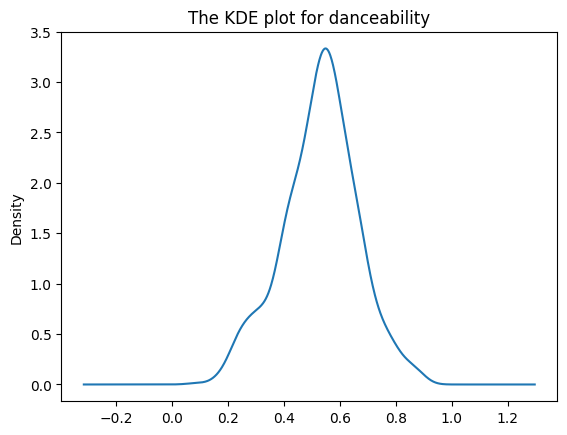

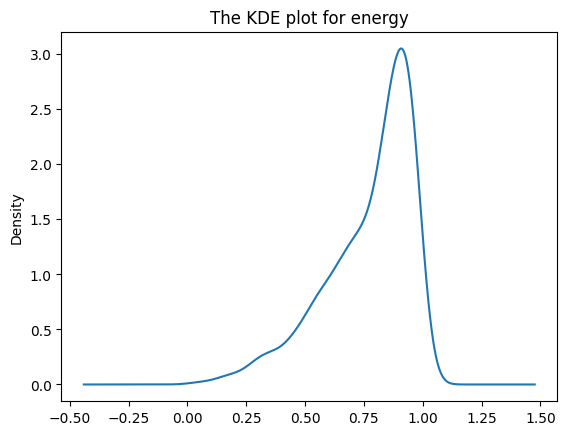

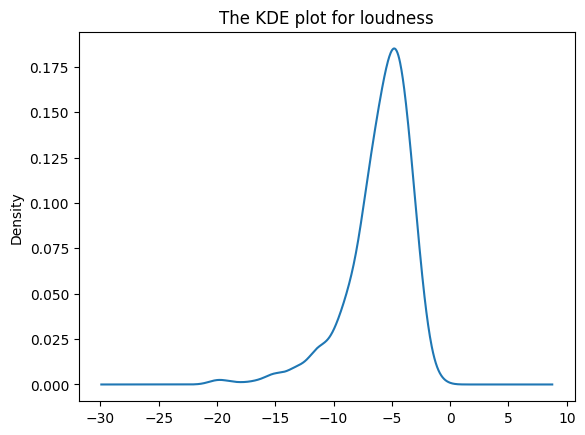

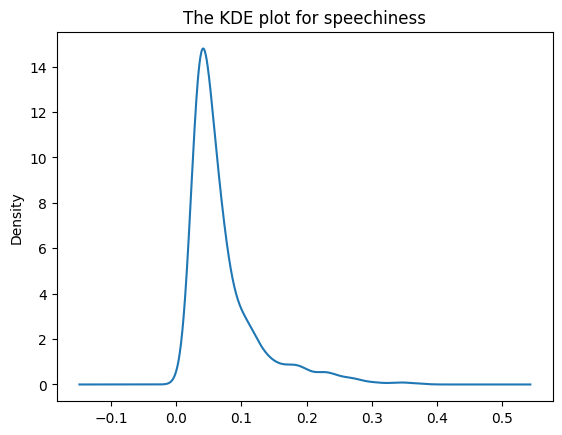

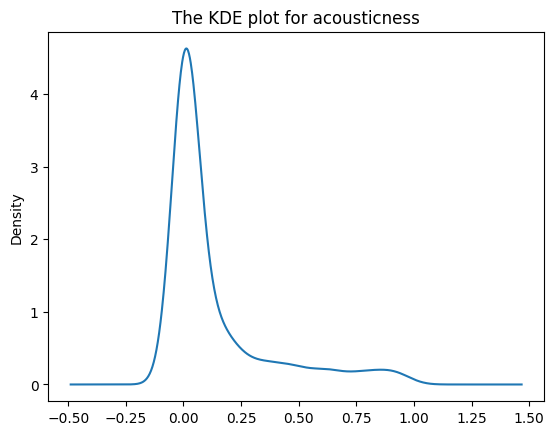

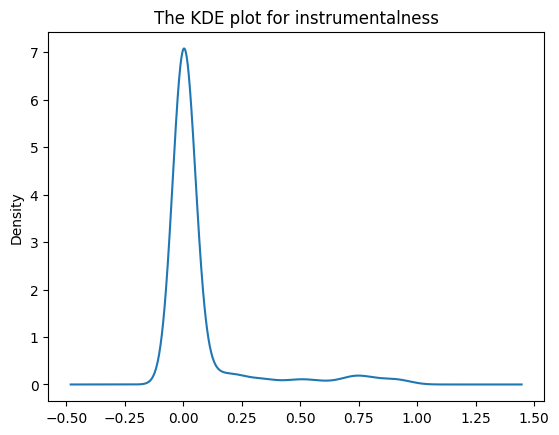

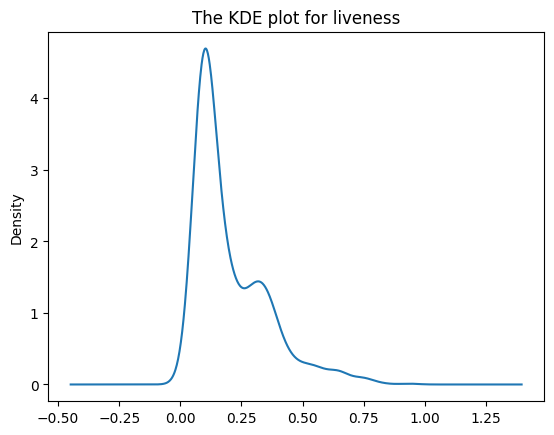

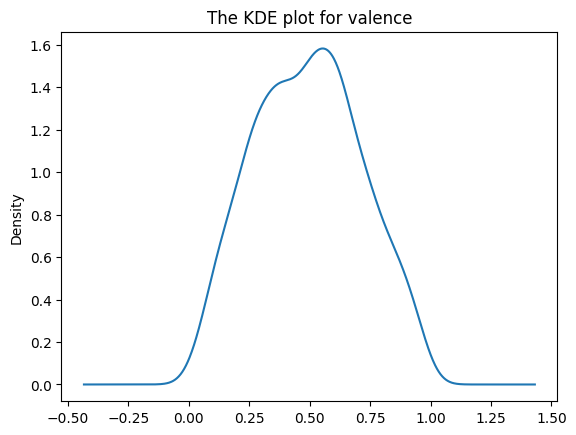

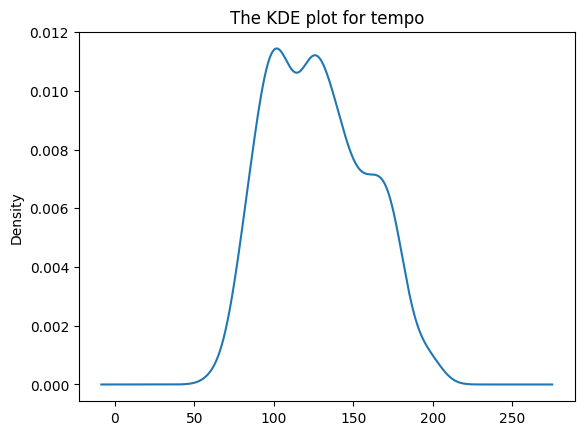

In [ ]:
#Plotting the density of values for each of the remaining columns
for item in friend.columns:
  print("")
  friend[item].plot(kind='kde')
  plt.title(f"The KDE plot for {item}")
  plt.show()

In [ ]:
#Using cosine similarity between the two lists
cosine_sim = cosine_similarity(finals, friend)

In [ ]:
#Findig the track with the highest similarity score within the All new rock tracklist
max_sim = -1
max_track = ''
for i in range(len(cosine_sim)):
    for j in range(len(cosine_sim[i])):
        if cosine_sim[i][j] > max_sim:
            max_sim = cosine_sim[i][j]
            max_track = final.iloc[i]["id"]

In [ ]:
max_track

'5BYFTBHpnDxOzZKFnI2fXp'

In [ ]:
#Looking up the title of the track in the Spotify database based on track id
data = sp.track(max_track)

In [ ]:
print(f"This week's best song is: {data['name']}") 

This week's best song is: Duvet Thief
